In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [5]:
file_path = '/Users/Devyani/msads/statmodels/finalproj/cleandata.csv'
cleaned_data = pd.read_csv(file_path)

In [7]:
features = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
X = cleaned_data[features]
y = (cleaned_data['arr_del15'] > 15).astype(int)

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
logistic_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

In [15]:
accuracy = logistic_model.score(X_test, y_test)
y_pred = logistic_model.predict(X_test)
print(f"Model Accuracy with L1 Regularization: {accuracy:.2f}\n")

Model Accuracy with L1 Regularization: 0.92



In [17]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     16032
           1       0.93      0.89      0.91     13994

    accuracy                           0.92     30026
   macro avg       0.92      0.92      0.92     30026
weighted avg       0.92      0.92      0.92     30026



In [19]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logistic_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print("Feature Importance:\n", coefficients)

Feature Importance:
                Feature  Coefficient
2            nas_delay     3.668037
4  late_aircraft_delay     3.556930
0        carrier_delay     2.686510
1        weather_delay     0.263400
3       security_delay     0.229330


In [21]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [22]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Best Hyperparameters:", grid_search.best_params_)
print(f"Tuned Model Accuracy: {accuracy_score(y_test, y_pred_best):.2f}\n")
print("Classification Report for Tuned Model:")
print(classification_report(y_test, y_pred_best))

Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Tuned Model Accuracy: 0.92

Classification Report for Tuned Model:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     16032
           1       0.93      0.89      0.91     13994

    accuracy                           0.92     30026
   macro avg       0.92      0.92      0.92     30026
weighted avg       0.92      0.92      0.92     30026



In [ ]:
#find formula for report

In [27]:
intercept = logistic_model.intercept_[0]  
coefficients = logistic_model.coef_[0] 
formula_parts = [f"{coef:.4f} * {feature}" for coef, feature in zip(coefficients, features)]
formula = f"logit(p) = {intercept:.4f} + " + " + ".join(formula_parts)
print("Model Formula:")
print(formula)

Model Formula:
logit(p) = 2.2755 + 2.6865 * carrier_delay + 0.2634 * weather_delay + 3.6680 * nas_delay + 0.2293 * security_delay + 3.5569 * late_aircraft_delay


In [ ]:
#generate relevant visualisations

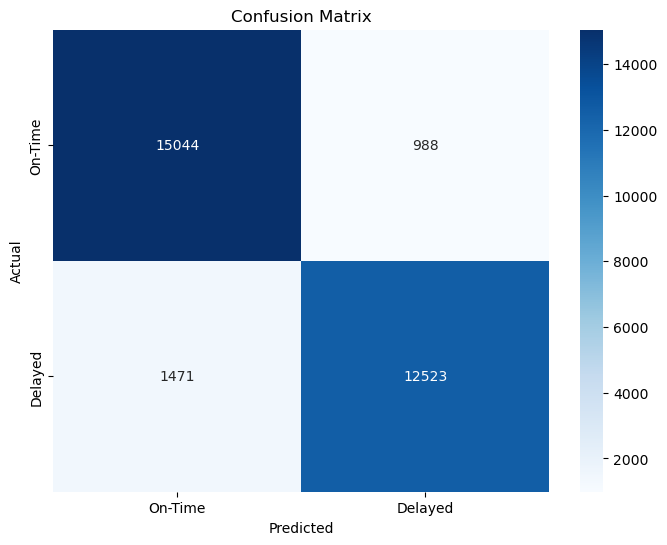

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["On-Time", "Delayed"], yticklabels=["On-Time", "Delayed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [31]:
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

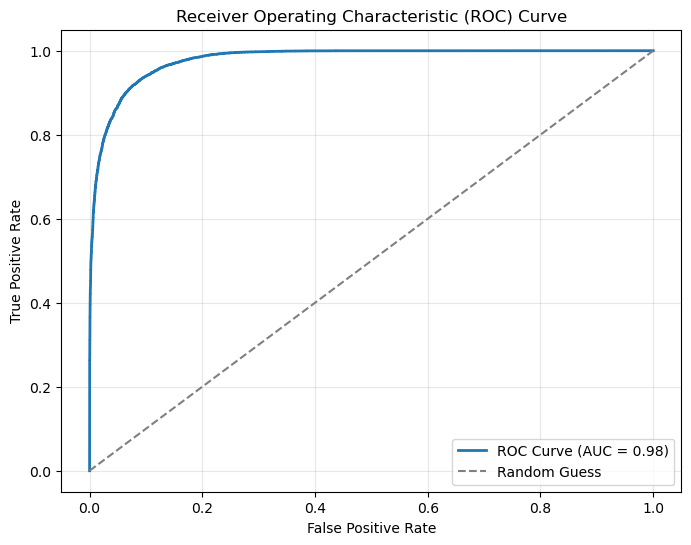

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [35]:
coefficients_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': logistic_model.coef_[0]
})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=True)

<Figure size 1000x600 with 0 Axes>

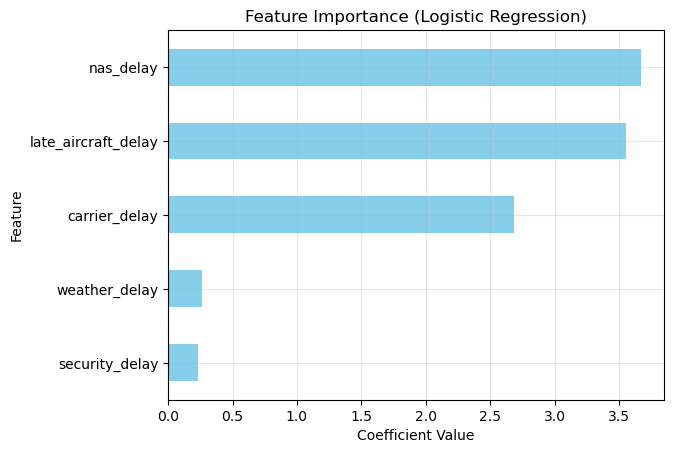

In [37]:
plt.figure(figsize=(10, 6))
coefficients_df.plot(
    kind='barh', x='Feature', y='Coefficient', legend=False, color='skyblue'
)
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(alpha=0.3)
plt.show()

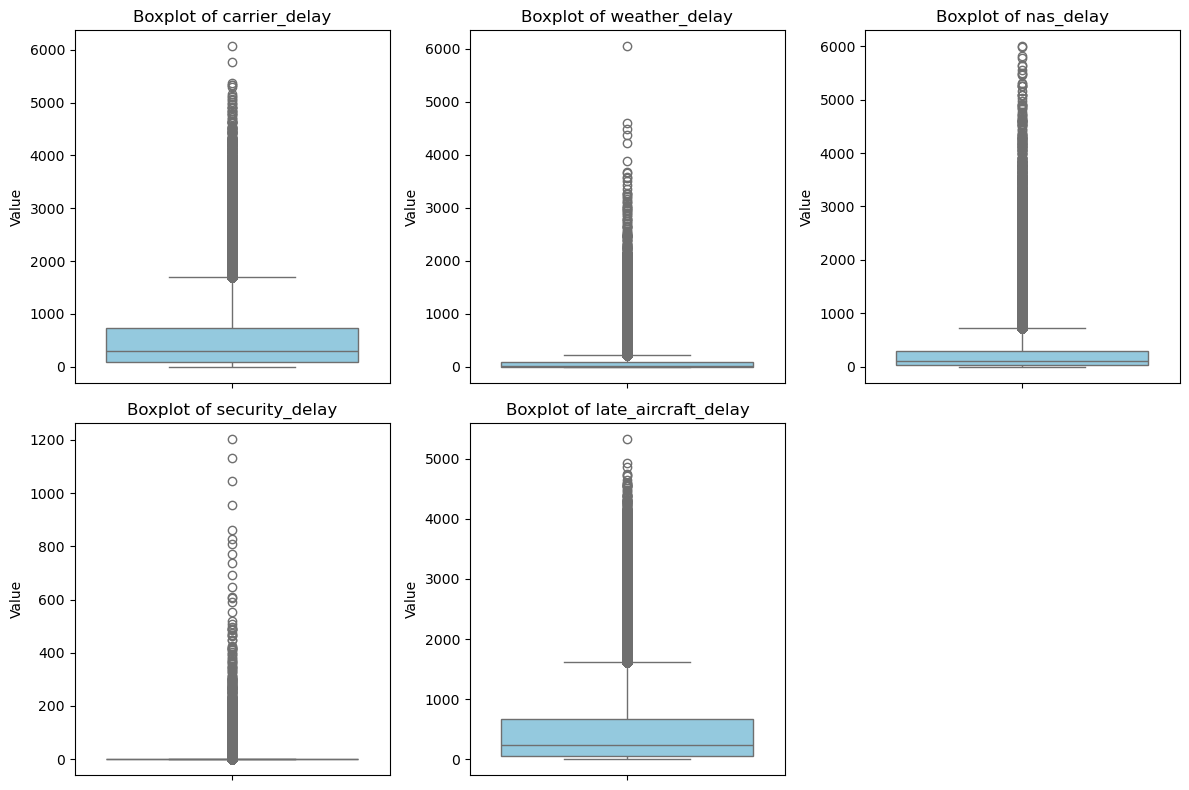

In [39]:
#finding outliers for report (not sure if needed)
features_to_plot = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)  # Arrange plots in a grid (2 rows, 3 columns)
    sns.boxplot(y=cleaned_data[feature], color="skyblue")
    plt.title(f'Boxplot of {feature}')
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [ ]:
#generate some kind of summary output

In [41]:
intercept = logistic_model.intercept_[0]
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': logistic_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print("Intercept:", intercept)
print("\nCoefficients:")
print(coefficients)

Intercept: 2.2754846661064723

Coefficients:
               Feature  Coefficient
2            nas_delay     3.668037
4  late_aircraft_delay     3.556930
0        carrier_delay     2.686510
1        weather_delay     0.263400
3       security_delay     0.229330


In [43]:
print("\nAccuracy:", accuracy_score(y_test, logistic_model.predict(X_test)))
print("\nClassification Report:")
print(classification_report(y_test, logistic_model.predict(X_test)))


Accuracy: 0.9181043095983481

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     16032
           1       0.93      0.89      0.91     13994

    accuracy                           0.92     30026
   macro avg       0.92      0.92      0.92     30026
weighted avg       0.92      0.92      0.92     30026



In [ ]:
#visualisations for interaction terms for report (also not sure if needed)

In [51]:
cleaned_data['weather_bin'] = pd.cut(cleaned_data['weather_delay'], bins=10)
cleaned_data['nas_bin'] = pd.cut(cleaned_data['nas_delay'], bins=10)
heatmap_data_binned = cleaned_data.pivot_table(
    index='weather_bin', columns='nas_bin', values='weather_nas_interaction', aggfunc='mean'
)

/var/folders/tp/65gd6xdd44xf84np6mcj1w480000gp/T/ipykernel_30780/4179761555.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data_binned = cleaned_data.pivot_table(


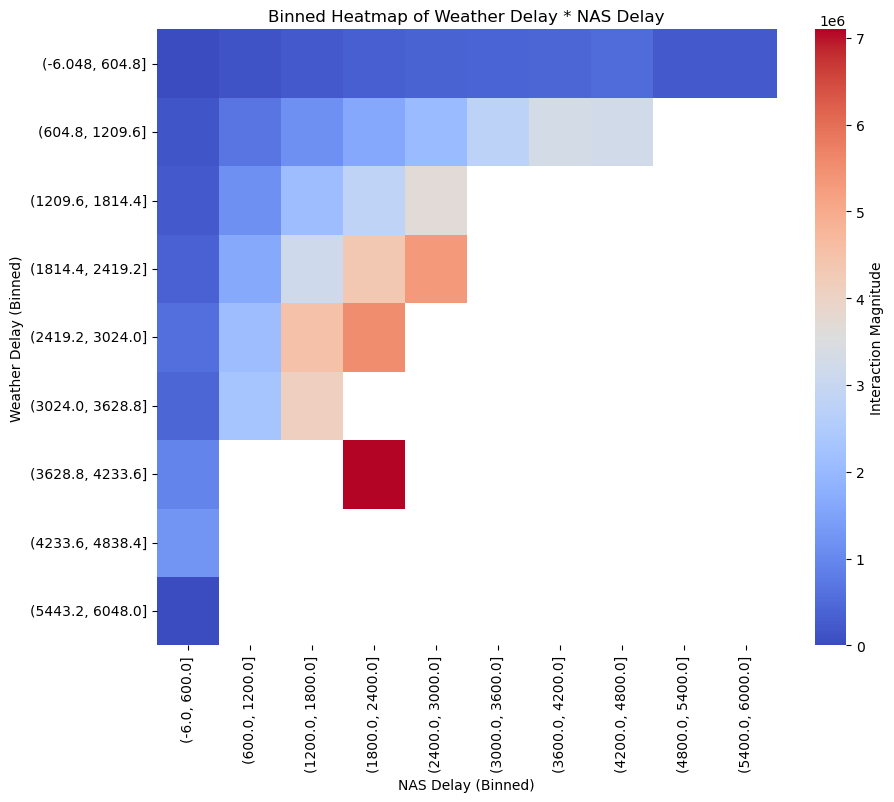

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_binned, cmap='coolwarm', cbar_kws={'label': 'Interaction Magnitude'})
plt.title('Binned Heatmap of Weather Delay * NAS Delay')
plt.xlabel('NAS Delay (Binned)')
plt.ylabel('Weather Delay (Binned)')
plt.show()

In [ ]:
#visualisations for log transformations for outliers (addressing outlier sensitivity)

In [57]:
log_transformed_data = cleaned_data.copy()
features_to_transform = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

for feature in features_to_transform:
    log_transformed_data[f'log_{feature}'] = np.log1p(log_transformed_data[feature])

In [59]:
log_transformed_data['log_weather_nas_interaction'] = (
    log_transformed_data['log_weather_delay'] * log_transformed_data['log_nas_delay']
)
log_transformed_data['log_carrier_late_interaction'] = (
    log_transformed_data['log_carrier_delay'] * log_transformed_data['log_late_aircraft_delay']
)

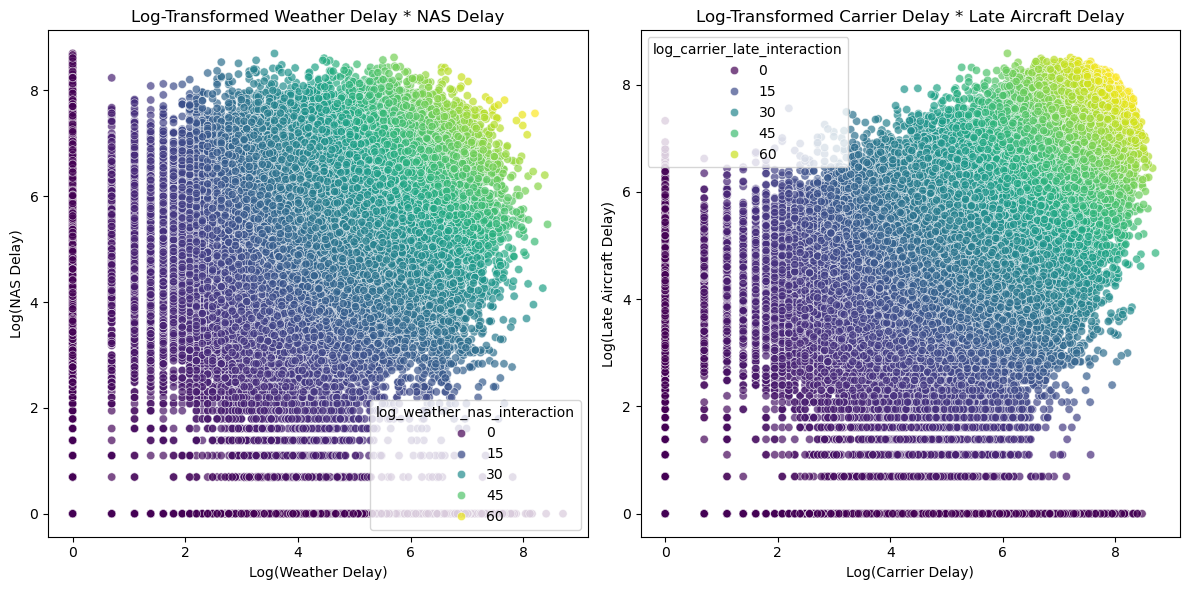

In [61]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=log_transformed_data['log_weather_delay'],
    y=log_transformed_data['log_nas_delay'],
    hue=log_transformed_data['log_weather_nas_interaction'],
    palette="viridis",
    alpha=0.7
)
plt.title('Log-Transformed Weather Delay * NAS Delay')
plt.xlabel('Log(Weather Delay)')
plt.ylabel('Log(NAS Delay)')

plt.subplot(1, 2, 2)
sns.scatterplot(
    x=log_transformed_data['log_carrier_delay'],
    y=log_transformed_data['log_late_aircraft_delay'],
    hue=log_transformed_data['log_carrier_late_interaction'],
    palette="viridis",
    alpha=0.7
)
plt.title('Log-Transformed Carrier Delay * Late Aircraft Delay')
plt.xlabel('Log(Carrier Delay)')
plt.ylabel('Log(Late Aircraft Delay)')

plt.tight_layout()
plt.show()